In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('iris.csv', index_col='Id')

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.shape

(150, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


C:\Users\Shayeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

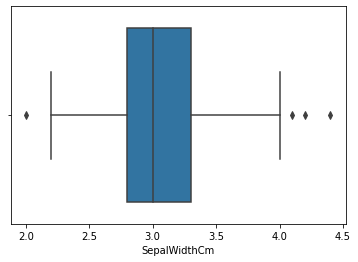

In [15]:
sns.boxplot(df.SepalWidthCm)

<AxesSubplot:>

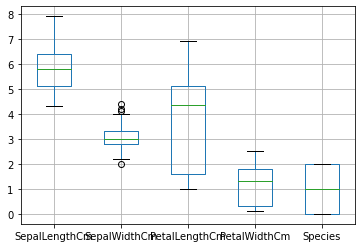

In [17]:
df.boxplot()

# Z-Score

In [19]:
from scipy import stats

In [21]:
stats.kurtosis(df.SepalWidthCm)

0.24144329938318343

In [22]:
stats.skew(df.SepalWidthCm)

0.330702812773315

C:\Users\Shayeda\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

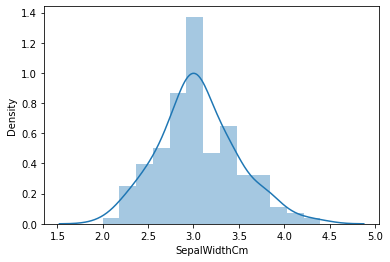

In [23]:
sns.distplot(df.SepalWidthCm)

In [24]:
z_score_sepalwidth=stats.zscore(df.SepalWidthCm)

In [25]:
z_score_sepalwidth

array([ 1.03205722, -0.1249576 ,  0.33784833,  0.10644536,  1.26346019,
        1.95766909,  0.80065426,  0.80065426, -0.35636057,  0.10644536,
        1.49486315,  0.80065426, -0.1249576 , -0.1249576 ,  2.18907205,
        3.11468391,  1.95766909,  1.03205722,  1.72626612,  1.72626612,
        0.80065426,  1.49486315,  1.26346019,  0.56925129,  0.80065426,
       -0.1249576 ,  0.80065426,  1.03205722,  0.80065426,  0.33784833,
        0.10644536,  0.80065426,  2.42047502,  2.65187798,  0.10644536,
        0.33784833,  1.03205722,  0.10644536, -0.1249576 ,  0.80065426,
        1.03205722, -1.74477836,  0.33784833,  1.03205722,  1.72626612,
       -0.1249576 ,  1.72626612,  0.33784833,  1.49486315,  0.56925129,
        0.33784833,  0.33784833,  0.10644536, -1.74477836, -0.58776353,
       -0.58776353,  0.56925129, -1.51337539, -0.35636057, -0.8191665 ,
       -2.43898725, -0.1249576 , -1.97618132, -0.35636057, -0.35636057,
        0.10644536, -0.1249576 , -0.8191665 , -1.97618132, -1.28

C:\Users\Shayeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

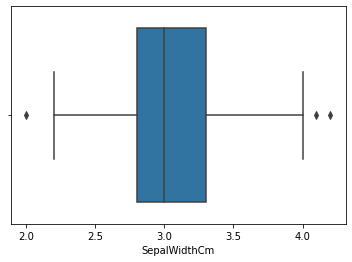

In [39]:
df_outliers_removed=df[(z_score_sepalwidth>=-3)&(z_score_sepalwidth<=3)]
sns.boxplot(df_outliers_removed.SepalWidthCm)

# IQR

C:\Users\Shayeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

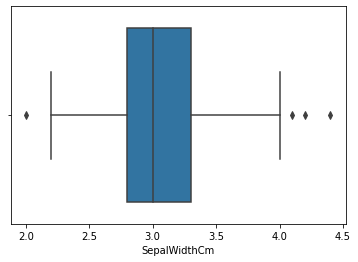

In [36]:
sns.boxplot(df.SepalWidthCm)

In [40]:
Q1 = np.percentile(df.SepalWidthCm,25)
Q3 = np.percentile(df.SepalWidthCm,75)

In [44]:
IQR=Q3-Q1
IQR

0.5

In [45]:
stats.iqr(df.SepalWidthCm)

0.5

In [49]:
Lower_bound=Q1-(1.5*IQR)

In [48]:
Upper_bound=Q3+(1.5*IQR)

In [51]:
df_IQR=df[(df.SepalWidthCm>=Lower_bound)&(df.SepalWidthCm<=Upper_bound)]


<AxesSubplot:>

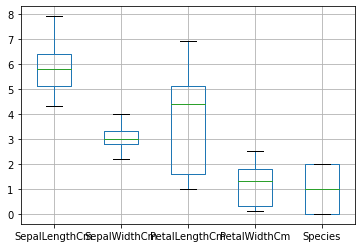

In [52]:
df_IQR.boxplot()

C:\Users\Shayeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

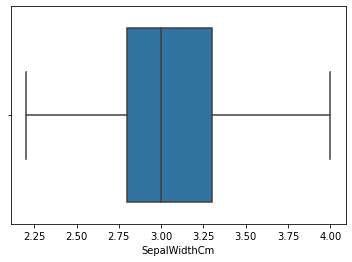

In [54]:
sns.boxplot(df_IQR.SepalWidthCm)

C:\Users\Shayeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

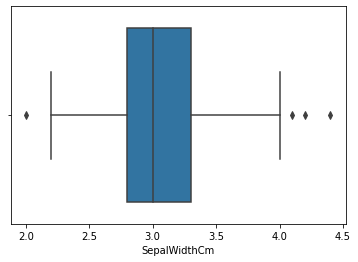

In [55]:
sns.boxplot(df.SepalWidthCm)

# Linearity

In [56]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000
